# 🤖 Data Modeling with Random Forest

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pickle

import sys
import os

sys.path.append(os.path.abspath('..'))  

from utils.data_training_utils import train_test_model_with_hyperparameter_tuning, train_final_model_for_production


In [7]:
df = pd.read_csv("../data/working_data/data_cleaned_20250901.csv")

In [8]:
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype("category")

In [9]:
from sklearn.preprocessing import LabelEncoder

df_numeric = df.copy()
encoders = {}

for col in df_numeric.select_dtypes(include="category").columns:
    le = LabelEncoder()
    df_numeric[col] = le.fit_transform(df_numeric[col].astype(str))
    encoders[col] = le

# Save the encoders
with open("../data/app_data/encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [10]:
param_grid = {
    "n_estimators": [50, 100, 200, 300, 500],
    "max_depth": [None, 10, 20, 30, 50],
    "min_samples_split": [2, 5, 10 , 20],
    "min_samples_leaf": [1, 2, 4, 8]
}

model = RandomForestRegressor(random_state=42)

### Random Forest Model for rental prices 

In [11]:
df_numeric_rent = df_numeric[df_numeric['operation'] == 0]

best_rent_num_model, best_rent_num_params, mae_train, r2_train, mae_test, r2_test = train_test_model_with_hyperparameter_tuning(
    model, param_grid, df_numeric_rent, drop_features=['operation'])

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best model found: RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=20,
                      n_estimators=50, random_state=42)
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 50}
Best training MAE: 113.02696100654805
Best training R2: 0.9582906897731418
·········································
MAE test: 84.39021256002766
R2 test: 0.9683820788602757


In [12]:
final_rent_model, model_path = train_final_model_for_production(best_rent_num_model, df_numeric_rent, drop_features=['operation'], model_dir="../models")

·········································
Final RandomForestRegressor trained with ALL data ✅
MAE (on full data): 71.8978
R2  (on full data): 0.9806
Model saved to: ../models\RandomForestRegressor_production_202509051708.joblib


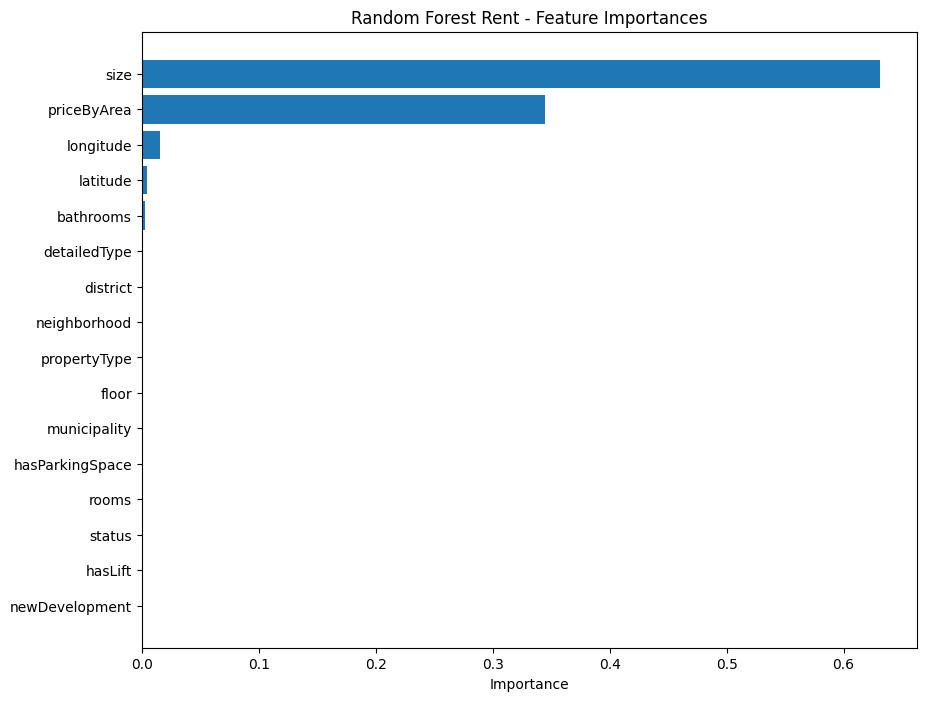

In [13]:
importances = final_rent_model.feature_importances_
indices = np.argsort(importances)[::-1]

X_columns = df_numeric_rent.drop(columns=['price', 'operation']).columns
plt.figure(figsize=(10, 8))
plt.barh(np.array(X_columns)[indices], importances[indices])
plt.gca().invert_yaxis()
plt.title("Random Forest Rent - Feature Importances")
plt.xlabel("Importance")
plt.show()

### Random Forest Model for sale prices

In [14]:
df_numeric_sale = df_numeric[df_numeric['operation'] == 1]

best_sale_num_model, best_sale_num_params, mae_train, r2_train, mae_test, r2_test = train_test_model_with_hyperparameter_tuning(
    model, param_grid, df_numeric_sale, drop_features=['operation'])

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best model found: RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=20,
                      n_estimators=50, random_state=42)
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 50}
Best training MAE: 40966.15262688637
Best training R2: 0.9656010779137489
·········································
MAE test: 34388.3964069338
R2 test: 0.9780767694052507


In [15]:
final_sale_model, sale_model_path = train_final_model_for_production(best_sale_num_model, df_numeric_sale, drop_features=['operation'], model_dir="../models")

·········································
Final RandomForestRegressor trained with ALL data ✅
MAE (on full data): 24902.5034
R2  (on full data): 0.9858
Model saved to: ../models\RandomForestRegressor_production_202509051754.joblib


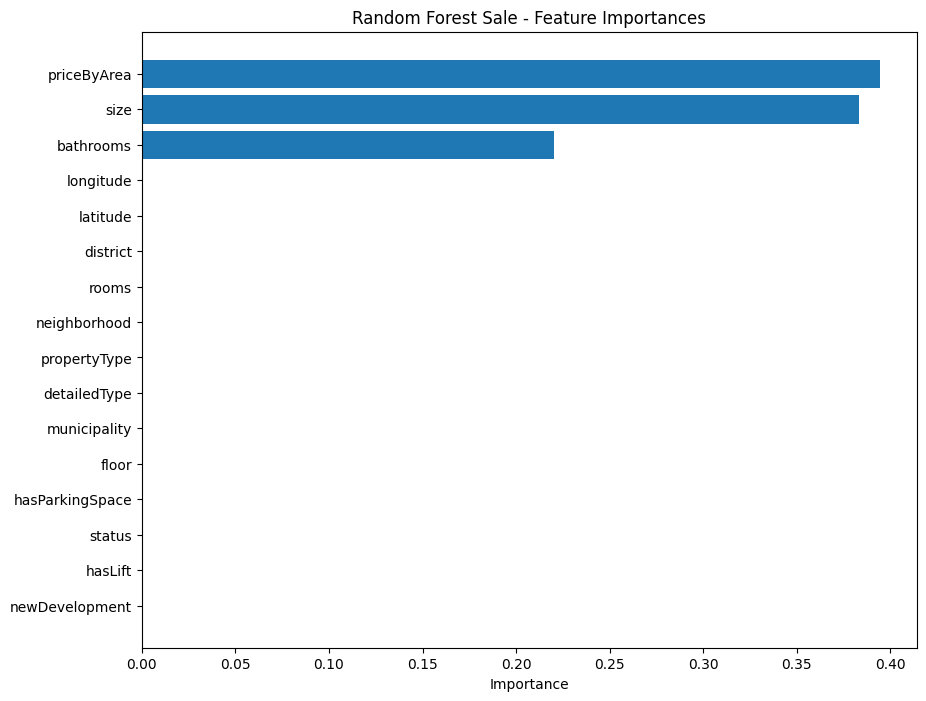

In [16]:
importances = final_sale_model.feature_importances_
indices = np.argsort(importances)[::-1]

X_columns = df_numeric_sale.drop(columns=['price', 'operation']).columns

plt.figure(figsize=(10, 8))
plt.barh(np.array(X_columns)[indices], importances[indices])
plt.gca().invert_yaxis()
plt.title("Random Forest Sale - Feature Importances")
plt.xlabel("Importance")
plt.show()